Querstion 1 - Install the Quandl library

In [1]:
# Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

Question 2 - Find a data set to work and import it into your Jupyter notebook.

In [15]:
# Import data set - House Price index?
data_2 = quandl.get('FRED/HPIPONM226S')

In [16]:
data_2.head()

Value
Date              
1991-01-01  100.00
1991-02-01  100.47
1991-03-01  100.47
1991-04-01  100.32
1991-05-01  100.38

In [17]:
data_2.shape

(371, 1)

In [18]:
type(data_2)

pandas.core.frame.DataFrame

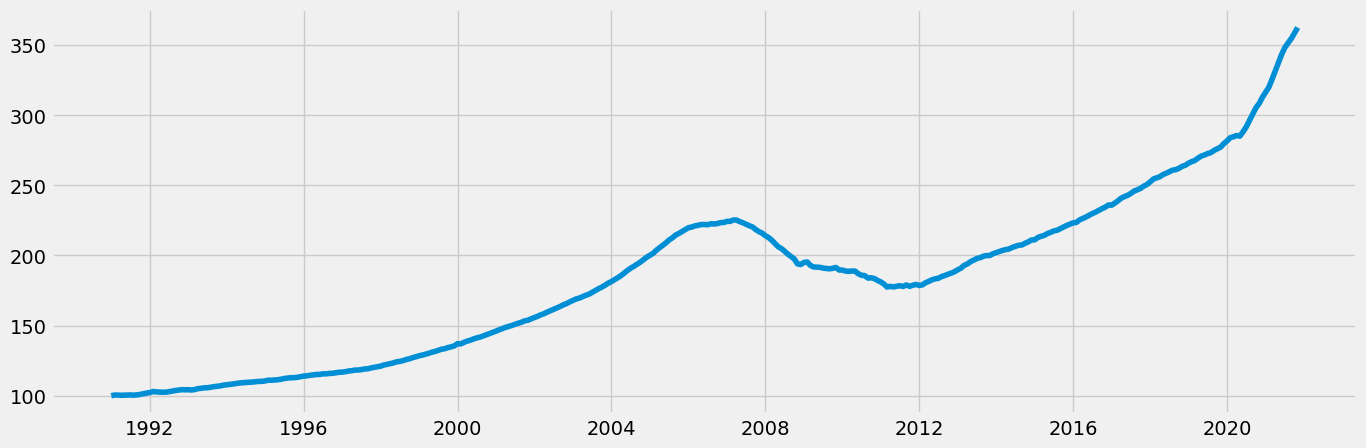

In [19]:
# Plot data
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_2)

No need to subset the data - will need to account for the 2008 financial crash later on

Question 4 - Create a line chart of your data

In [20]:
# Reset index so that you can use the Date column as a filter

data_2 = data_2.reset_index()

In [21]:
data_2.head()

Date   Value
0 1991-01-01  100.00
1 1991-02-01  100.47
2 1991-03-01  100.47
3 1991-04-01  100.32
4 1991-05-01  100.38

In [22]:
# Set the "Date" column as the index

from datetime import datetime

data_2['datetime'] = pd.to_datetime(data_2['Date']) # Create a datetime column from "Date.""
data_2 = data_2.set_index('datetime') # Set the datetime as the index of the dataframe.
data_2.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_2.head()

Value
datetime          
1991-01-01  100.00
1991-02-01  100.47
1991-03-01  100.47
1991-04-01  100.32
1991-05-01  100.38

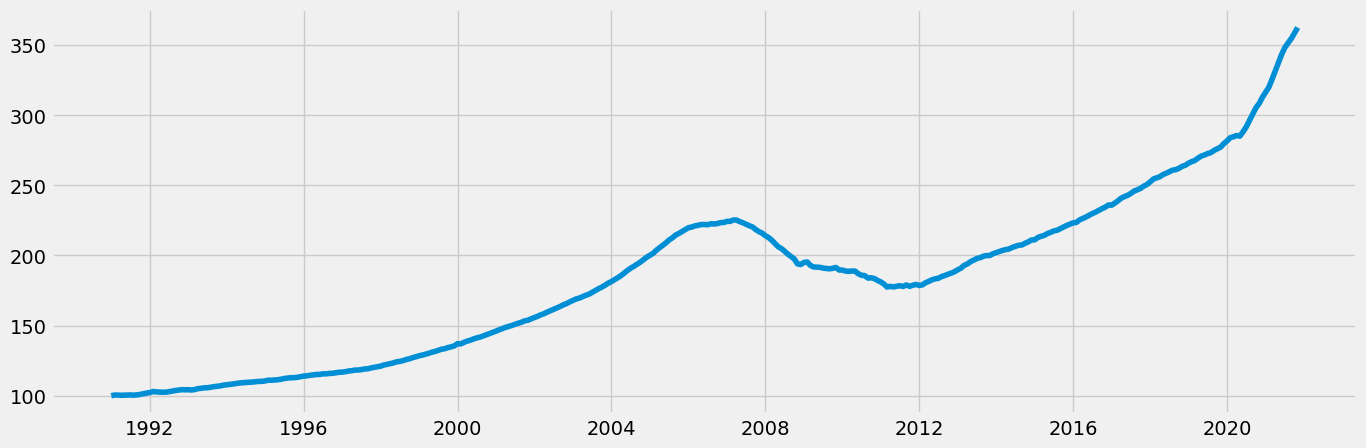

In [23]:
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(data_2)

Question 5 - Decompose the data's components

In [24]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_2, model='additive')

In [25]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

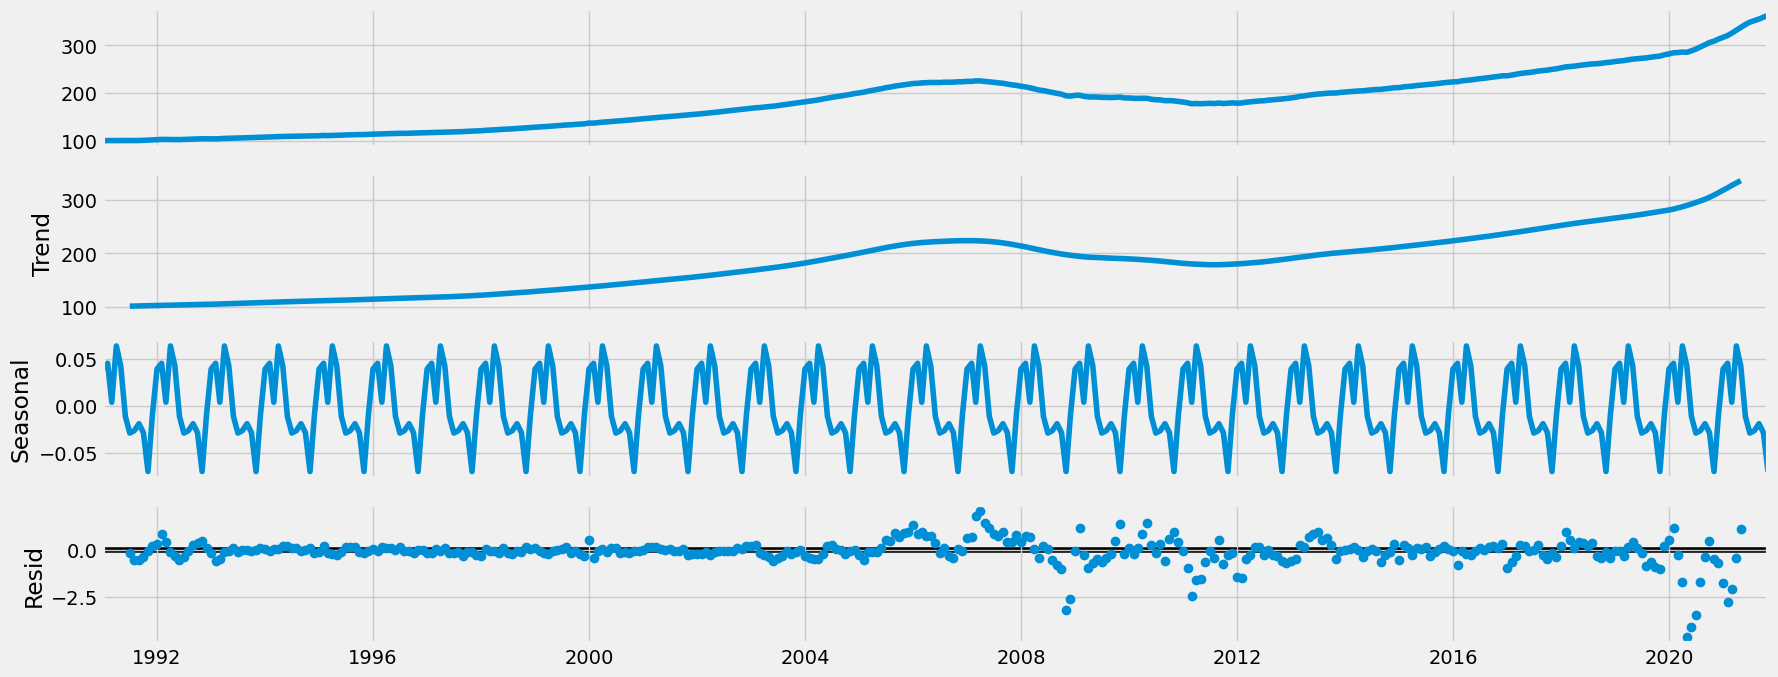

In [26]:
# Plot the separate components

decomposition.plot()
plt.show()

From the above, we can see a positive trend of increasing HPI from 1992 to 2020. We can also see a fall in the year 2008 which makes sense as this was a time of financial crisis.

Question 6 - Conduct a Dickey-Fuller test to check for stationarity

In [27]:
from statsmodels.tsa.stattools import adfuller

In [30]:
# Define function
def dickey_fuller(timeseries):

# Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   1.277269
p-value                          0.996479
Number of Lags Used             12.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


Observations:

The test statistic of 1.28 is greater than the critical value (%5) of -2.87. Since the test statistic is larger than the critical value, we cannot reject the null hypothesis.

The p-value is 0.996 which means that the test result is not significant. 

Question 7 - Conduct a round of differencing on it and repeat step 6

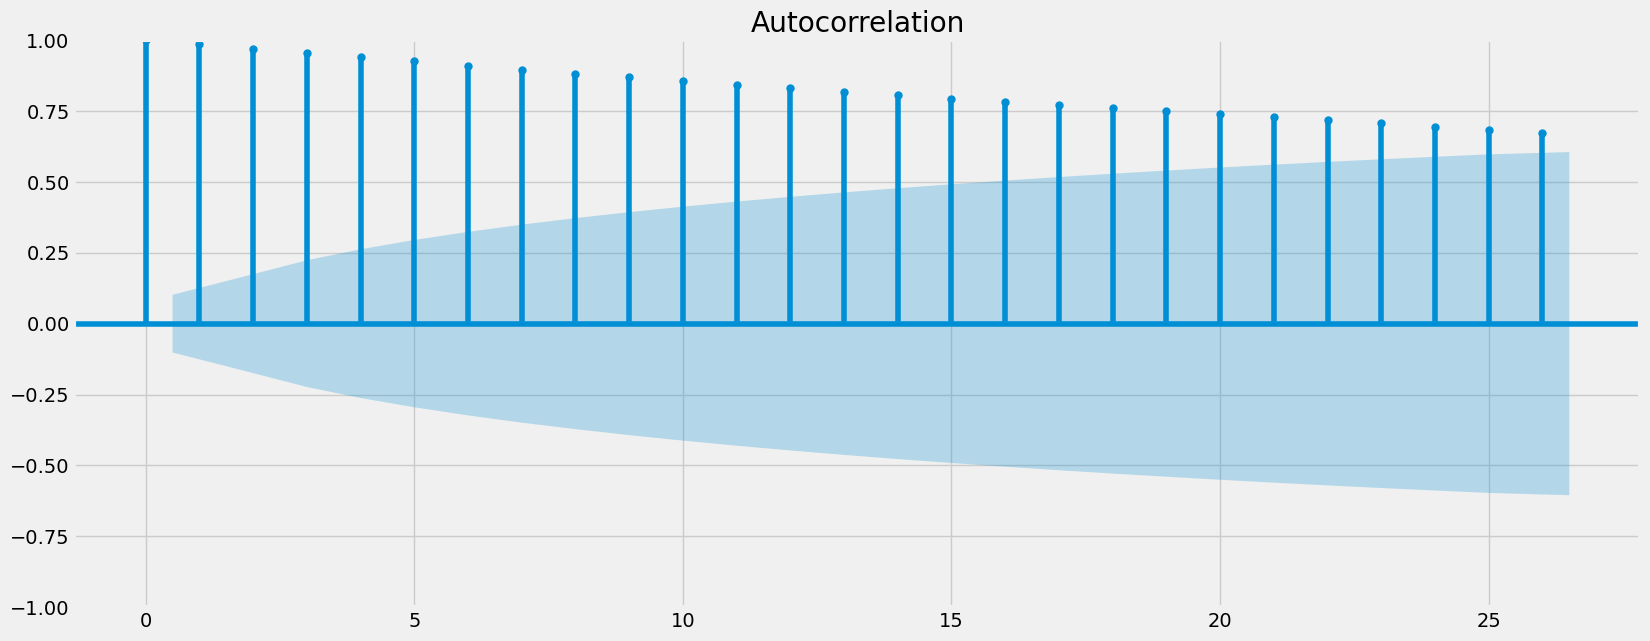

In [31]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_2)
plt.show()

In [32]:
data_diff = data_2 - data_2.shift(1)

In [33]:
# Remove the missing values that came about as a result of the differencing 
data_diff.dropna(inplace = True)

In [34]:
data_diff.head()

Value
datetime         
1991-02-01   0.47
1991-03-01   0.00
1991-04-01  -0.15
1991-05-01   0.06
1991-06-01   0.14

In [35]:
data_diff.columns

Index(['Value'], dtype='object')

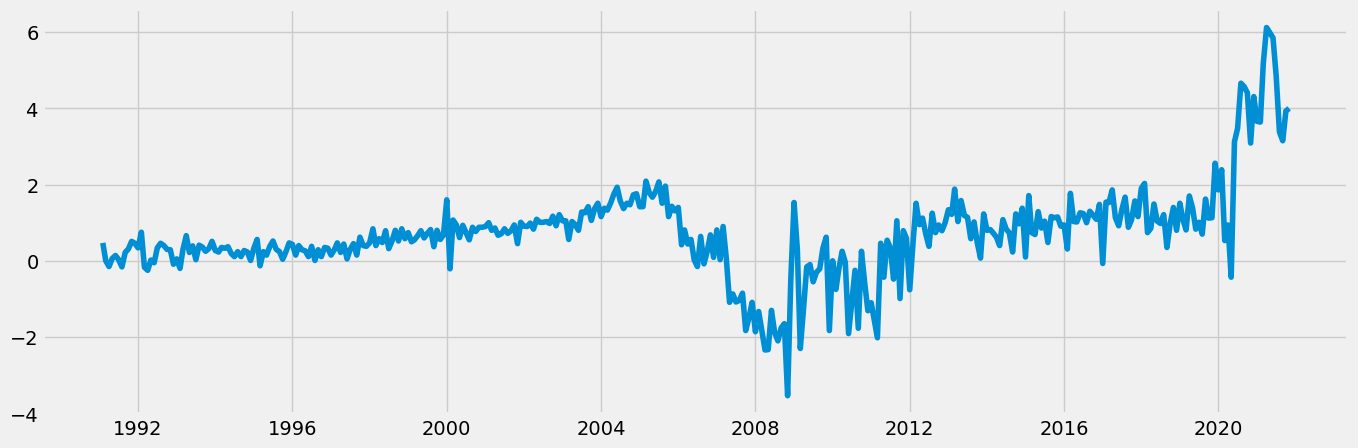

In [36]:
# Re-plot with differencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [37]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.100668
p-value                          0.244246
Number of Lags Used             11.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


The test statistic is -2.1 which is still greater than the critical value (5%) of -2.8. Next step would be another round of differencing.

Question 8 - Repeat another round of differencing

In [38]:
data_diff_2 = data_diff - data_diff.shift(1)

In [39]:
data_diff_2.dropna(inplace = True)

In [40]:
data_diff_2.head()

Value
datetime         
1991-03-01  -0.47
1991-04-01  -0.15
1991-05-01   0.21
1991-06-01   0.08
1991-07-01  -0.11

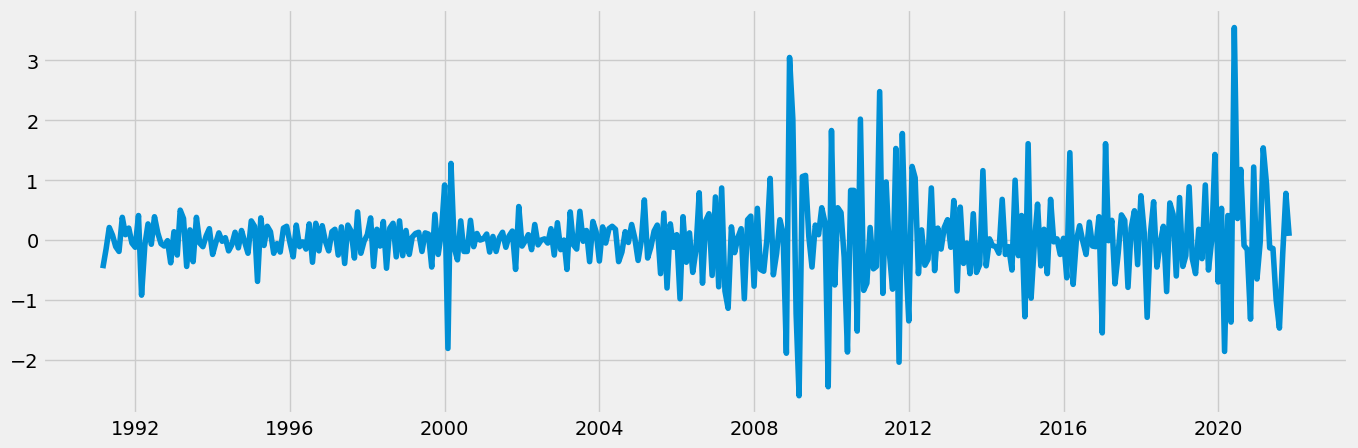

In [41]:
# Re-plot with differencing

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [42]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                  -5.018601
p-value                          0.000020
Number of Lags Used             14.000000
Number of Observations Used    354.000000
Critical Value (1%)             -3.448958
Critical Value (5%)             -2.869739
Critical Value (10%)            -2.571138
dtype: float64


The test statistic is -5.02 which is less than the critical value (5%) of -2.87. This means we can reject the null hypothesis.

Question 9 - Check your data's autocorrelations

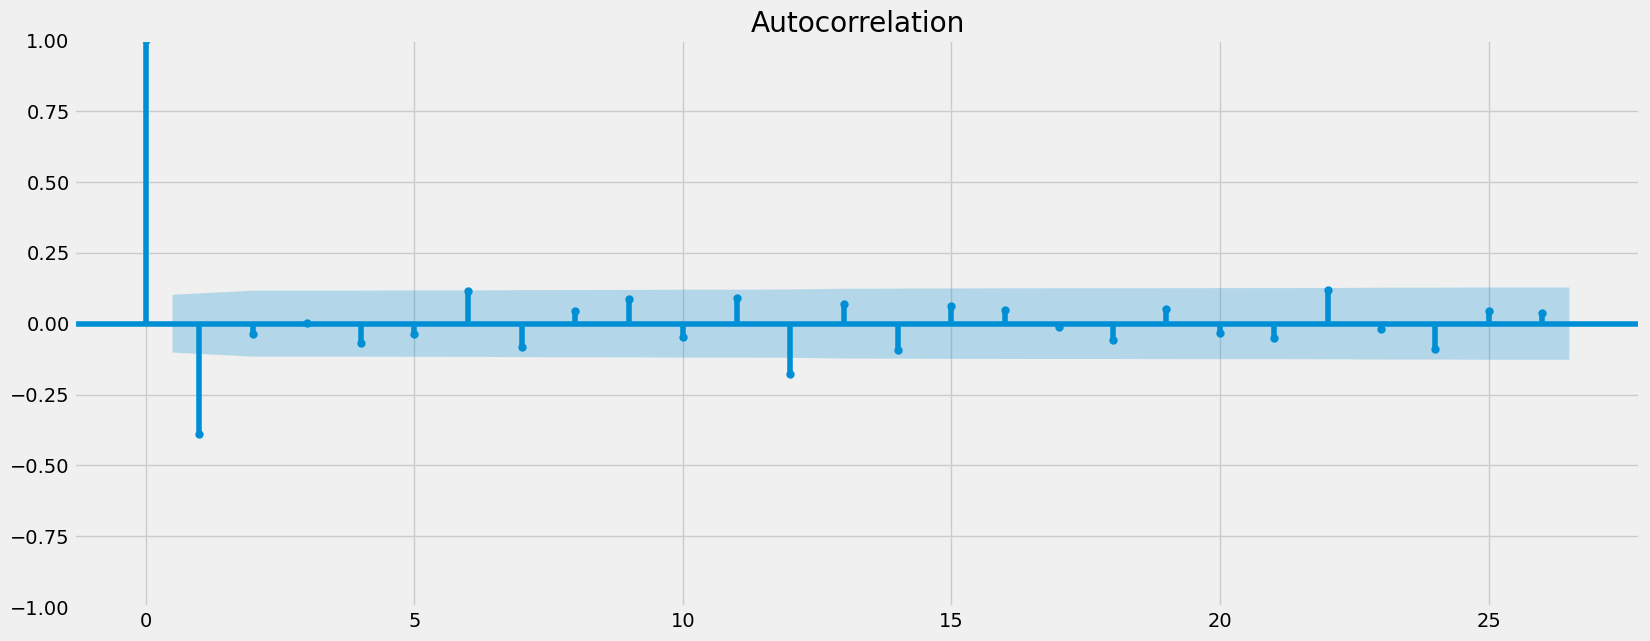

In [43]:
plot_acf(data_diff_2)
plt.show()

The autocorrelation plot has definitely improved; however, there are still a few autocorrelated terms. This 